In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Read data

In [2]:
data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
180,male,group C,master's degree,free/reduced,completed,62,68,75
513,female,group B,some high school,standard,completed,54,61,62
67,female,group C,some college,standard,none,60,72,74
148,female,group D,bachelor's degree,standard,completed,68,75,81
693,female,group D,associate's degree,standard,none,77,77,73


In [3]:
data["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [4]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [5]:
print(data["math score"].max())
print(data["reading score"].max())
print(data["writing score"].max())

100
100
100


# Let's see the relatively more successful students

In [6]:
new_data = data[(data["math score"] >= 80) & (data["reading score"] >= 80) & (data["writing score"] >= 80)]
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
49,male,group C,high school,standard,completed,82,84,82
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94


## What is their gender?

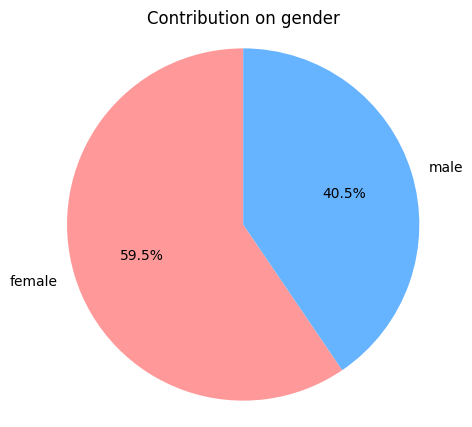

In [7]:
gender_counts_all = new_data['gender'].value_counts()
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5, 5))
plt.pie(gender_counts_all, labels=gender_counts_all.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Contribution on gender')
plt.axis('equal') 
plt.show()

## What is their race?

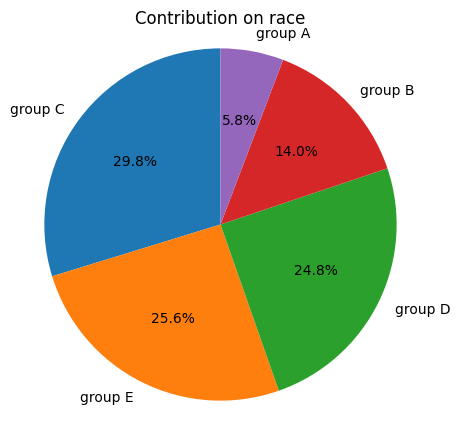

In [8]:
race_counts_all = new_data['race/ethnicity'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(race_counts_all, labels=race_counts_all.index, autopct='%1.1f%%', startangle=90)
plt.title('Contribution on race')
plt.axis('equal') 
plt.show()

## What is their parental level of education

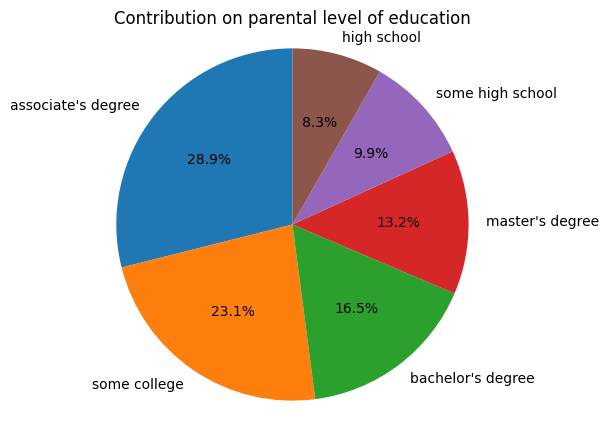

In [9]:
par_edu_level_all = new_data['parental level of education'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(par_edu_level_all, labels=par_edu_level_all.index, autopct='%1.1f%%', startangle=90)
plt.title('Contribution on parental level of education')
plt.axis('equal') 
plt.show()

# Lets see the students that are good at math

In [10]:
data_math = data[data["math score"]>=90]
data_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
34,male,group E,some college,standard,none,97,87,82
104,male,group C,some college,standard,completed,98,86,90
114,female,group E,bachelor's degree,standard,completed,99,100,100
121,male,group B,associate's degree,standard,completed,91,89,92
149,male,group E,associate's degree,free/reduced,completed,100,100,93
165,female,group C,bachelor's degree,standard,completed,96,100,100
171,male,group E,some high school,standard,none,94,88,78
179,female,group D,some high school,standard,completed,97,100,100
233,male,group E,some high school,standard,none,92,87,78


In [11]:
len(data_math)

58

## Distribution

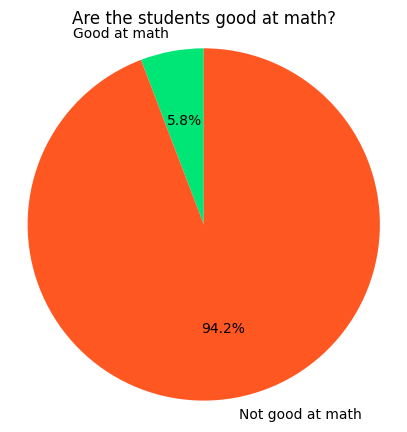

In [12]:
good_at_math = len(data_math)
not_goog_at_math = len(data)-len(data_math)

sizes = [good_at_math, not_goog_at_math]
labels = ["Good at math", "Not good at math"]
colors = ["#00E676","#FF5722"]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Are the students good at math?')
plt.axis('equal') 
plt.show()

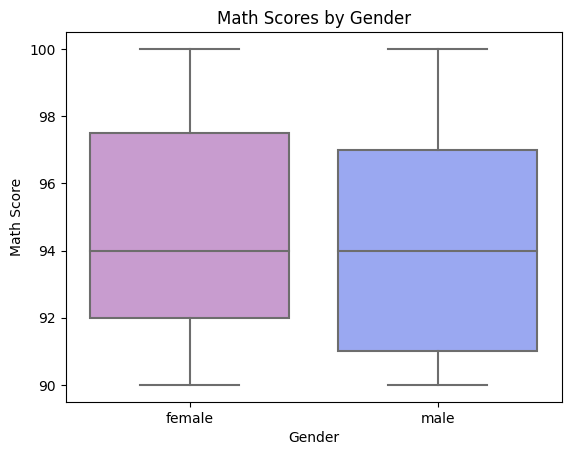

In [13]:
sns.boxplot(x='gender', y='math score', data=data_math, palette={"female": "#CE93D8", "male": "#8C9EFF"})
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Math Scores by Gender')
plt.show()